In this file we solve a 2x2 linear hyperbolic equation system with Godunovs method. 

imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

The formulation of the problem, we have A, ql, qr of the dam break problem:

$$ A = \begin{bmatrix} 2 & 3 \\ 4 & 1 \end{bmatrix} \; \; q_l=\begin{bmatrix} 1 \\ 2 \end{bmatrix}  \;\; q_r=\begin{bmatrix} 2 \\ -3 \end{bmatrix} $$

In [3]:
A = np.matrix([[2, 3], [4, 1]])
ql = np.matrix([[1], [2]])
qr = np.matrix([[2], [-3]])

Make a Riemann solver for 2x2 matrices:

In [4]:
def compare_vectors(v1, v2):
    if not(np.array_equal(v1, v2)):
        return False
    return np.allclose(v1, v2)

#make a random 2x2 matrix of integers
def Riemann_solver(q_l, q_r, A):
   D, R = np.linalg.eig(A)
   i = np.argsort(D)
   eigen_v = D[i]
   R = R[:, i]
   L = np.linalg.inv(R)
   alpha = L * (q_r - q_l)
   q_m1 = q_l + (alpha[0].item() * R[:, 0])
   ## making a check of the calculation
   states = {
        "left": q_l.flatten(),
        "middle": q_m1.flatten(),
        "right": q_r.flatten()
    }

   waves = {
       "left": round(eigen_v[0],10),
       "right": round(eigen_v[1],10)
   }

   return states, waves

Initial data:

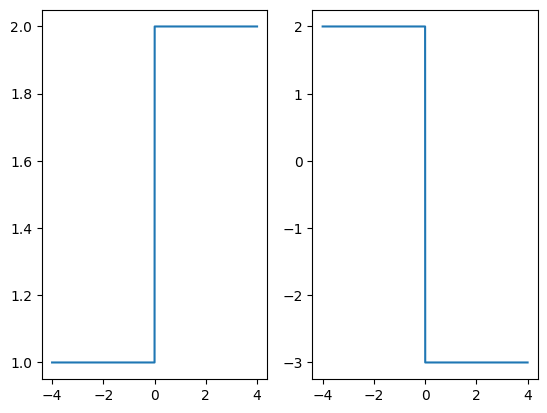

In [5]:
# we have x on an interval [0,2], t = [0,1] and we timestep each in 1001 steps, which gives us 1000 intervals
x_points = 10000
timesteps = 6000
x_length = 8
t_length = 2
x = np.linspace(-4,4,x_points+1)

# defining initial for a dambreak wave 
initial_dam_break = np.zeros((2,x_points+1))
for i in range(0,2):
    for j in range(0,x_points+1):
        if j < int(x_points/2):
            initial_dam_break[i][j] = ql[i][0].item()
        else:
            initial_dam_break[i][j] = qr[i][0].item()

#defining time interval and speed (u hat)
t_array = np.linspace(0,t_length,timesteps)
u_hat = 1.5 # this is u hat

#plot initial waves
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x,initial_dam_break[0])
ax2.plot(x,initial_dam_break[1])

In [6]:
Riemann_solver(ql, qr, A)

({'left': matrix([[1, 2]]),
  'middle': matrix([[ 3.57142857, -1.42857143]]),
  'right': matrix([[ 2, -3]])},
 {'left': -2.0, 'right': 5.0})